# Are there any external factors that influence the usage of the machines?

In this chapter we'll use machine learning to automatically identify the trends on the usage of the machines.

In [ ]:
# Load precipitation data
# Source: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/precipitation/
df_precipitation_data = pd.read_csv(
    "datasets/precipitation/produkt_rr_stunde_20230206_20240808_00433.txt",
    sep=";",
)

# Convert to datetime
df_precipitation_data["MESS_DATUM"] = pd.to_datetime(
    df_precipitation_data["MESS_DATUM"], format="%Y%m%d%H", utc=True
)

# Rename columns
df_precipitation_data = df_precipitation_data.rename(
    columns={
        "MESS_DATUM": "date_collected",
        "  R1": "precipitation",
        "WRTR": "precipitation_form",
        "STATIONS_ID": "station_id",
        "QN_8": "quality_of_precipitation",
        "RS_IND": "precipitation_indicator",
    },
).drop(columns=["eor", "precipitation_form", "precipitation_indicator"])


df_precipitation_data

,station_id,date_collected,quality_of_precipitation,precipitation
0,433,2023-02-06 00:00:00+00:00,3,0.0
1,433,2023-02-06 01:00:00+00:00,3,0.0
2,433,2023-02-06 02:00:00+00:00,3,0.0
3,433,2023-02-06 03:00:00+00:00,3,0.0
4,433,2023-02-06 04:00:00+00:00,3,0.0
...,...,...,...,...
13195,433,2024-08-08 19:00:00+00:00,1,0.0
13196,433,2024-08-08 20:00:00+00:00,1,0.0
13197,433,2024-08-08 21:00:00+00:00,1,0.0
13198,433,2024-08-08 22:00:00+00:00,1,0.0


In [ ]:
df_precipitation_data.describe()

,station_id,quality_of_precipitation,precipitation
count,13200.0,13200.000000,13200.000000
mean,433.0,2.734545,-7.261356
std,0.0,0.678585,85.334098
min,433.0,1.000000,-999.000000
25%,433.0,3.000000,0.000000
50%,433.0,3.000000,0.000000
75%,433.0,3.000000,0.000000
max,433.0,3.000000,23.100000


In [ ]:
# Load cloudiness data
# Source: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/cloudiness/

df_cloudiness_data = pd.read_csv(
    "datasets/cloudiness/produkt_n_stunde_20230206_20240808_00433.txt", sep=";"
)

df_cloudiness_data["MESS_DATUM"] = pd.to_datetime(
    df_cloudiness_data["MESS_DATUM"], format="%Y%m%d%H", utc=True
)

df_cloudiness_data = df_cloudiness_data.rename(
    columns={
        "MESS_DATUM": "date_collected",
        "QN_8": "quality_of_cloudiness",
        "STATIONS_ID": "station_id",
        " V_N": "cloudiness_level",
    },
).drop(columns=["eor", "V_N_I"])

df_cloudiness_data

,station_id,date_collected,quality_of_cloudiness,cloudiness_level
0,433,2023-02-06 00:00:00+00:00,3,8
1,433,2023-02-06 01:00:00+00:00,3,8
2,433,2023-02-06 02:00:00+00:00,3,8
3,433,2023-02-06 03:00:00+00:00,3,8
4,433,2023-02-06 04:00:00+00:00,3,7
...,...,...,...,...
13170,433,2024-08-08 19:00:00+00:00,1,7
13171,433,2024-08-08 20:00:00+00:00,1,0
13172,433,2024-08-08 21:00:00+00:00,1,8
13173,433,2024-08-08 22:00:00+00:00,1,8


In [ ]:
# Load temperature data
# Source: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/

df_temperature_data = pd.read_csv(
    "datasets/temperature/produkt_tu_stunde_20230206_20240808_00433.txt", sep=";"
)

df_temperature_data["MESS_DATUM"] = pd.to_datetime(
    df_temperature_data["MESS_DATUM"], format="%Y%m%d%H", utc=True
)

df_temperature_data = df_temperature_data.rename(
    columns={
        "MESS_DATUM": "date_collected",
        "QN_9": "quality_of_temperature",
        "STATIONS_ID": "station_id",
        "TT_TU": "temperature",
        "RF_TU": "relative_humidity",
    },
).drop(columns=["eor"])
df_temperature_data

,station_id,date_collected,quality_of_temperature,temperature,relative_humidity
0,433,2023-02-06 00:00:00+00:00,3,-3.3,81.0
1,433,2023-02-06 01:00:00+00:00,3,-4.0,84.0
2,433,2023-02-06 02:00:00+00:00,3,-4.2,86.0
3,433,2023-02-06 03:00:00+00:00,3,-4.2,85.0
4,433,2023-02-06 04:00:00+00:00,3,-3.2,80.0
...,...,...,...,...,...
13195,433,2024-08-08 19:00:00+00:00,1,21.5,52.0
13196,433,2024-08-08 20:00:00+00:00,1,18.9,67.0
13197,433,2024-08-08 21:00:00+00:00,1,17.1,77.0
13198,433,2024-08-08 22:00:00+00:00,1,15.6,84.0


In [ ]:
df_weather_data = df_precipitation_data.merge(
    df_temperature_data, on=["station_id", "date_collected"]
)
df_weather_data = df_weather_data.merge(df_cloudiness_data, on=["station_id", "date_collected"])

df_weather_data = df_weather_data.drop(
    columns=[
        "quality_of_precipitation",
        "quality_of_temperature",
        "quality_of_cloudiness",
        "station_id",
    ],
)

# Create columns for the merge
df_weather_data["day"] = df_weather_data["date_collected"].dt.day_of_year
df_weather_data["time_of_day"] = df_weather_data["date_collected"].dt.time

# # Create lead and lag features
time_shifts = [3, 24]

for lead in time_shifts:
    df_weather_data[f"precipitation_lead_{lead}h"] = df_weather_data["precipitation"].shift(-lead)
    df_weather_data[f"temperature_lead_{lead}h"] = df_weather_data["temperature"].shift(-lead)
    df_weather_data[f"cloudiness_lead_{lead}h"] = df_weather_data["cloudiness_level"].shift(-lead)

for lag in time_shifts:
    df_weather_data[f"precipitation_lag_{lag}h"] = df_weather_data["precipitation"].shift(lag)
    df_weather_data[f"temperature_lag_{lag}h"] = df_weather_data["temperature"].shift(lag)
    df_weather_data[f"cloudiness_lag_{lag}h"] = df_weather_data["cloudiness_level"].shift(lag)

# Filter data for the timeframe of the measurements
timedelta_1_hour = pd.Timedelta(hours=1)
df_weather_data = df_weather_data[
    (df_weather_data["date_collected"] > (first_day_of_measurements - timedelta_1_hour))
    & ((df_weather_data["date_collected"] < (last_day_of_measurements + timedelta_1_hour)))
]

df_weather_data

,date_collected,precipitation,temperature,relative_humidity,cloudiness_level,day,time_of_day,precipitation_lead_3h,temperature_lead_3h,cloudiness_lead_3h,precipitation_lead_24h,temperature_lead_24h,cloudiness_lead_24h,precipitation_lag_3h,temperature_lag_3h,cloudiness_lag_3h,precipitation_lag_24h,temperature_lag_24h,cloudiness_lag_24h
12159,2024-06-27 16:00:00+00:00,0.0,30.9,44.0,8,179,16:00:00,0.0,28.5,8.0,0.0,27.1,1.0,0.0,27.4,7.0,0.0,30.6,0.0
12160,2024-06-27 17:00:00+00:00,0.0,30.3,44.0,8,179,17:00:00,5.4,22.6,8.0,0.0,25.8,0.0,0.0,29.6,5.0,0.0,30.0,0.0
12161,2024-06-27 18:00:00+00:00,0.0,29.8,46.0,8,179,18:00:00,0.4,22.0,8.0,0.0,24.8,0.0,0.0,30.2,7.0,0.0,29.2,0.0
12162,2024-06-27 19:00:00+00:00,0.0,28.5,51.0,8,179,19:00:00,0.0,21.5,8.0,0.0,23.1,7.0,0.0,30.9,8.0,0.0,28.2,8.0
12163,2024-06-27 20:00:00+00:00,5.4,22.6,82.0,8,179,20:00:00,0.0,21.0,8.0,0.0,21.6,7.0,0.0,30.3,8.0,0.0,26.3,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12967,2024-07-31 08:00:00+00:00,0.0,24.5,51.0,8,213,08:00:00,0.0,28.6,7.0,0.0,23.6,0.0,0.0,19.4,6.0,0.0,21.3,6.0
12968,2024-07-31 09:00:00+00:00,0.0,26.5,47.0,5,213,09:00:00,0.0,28.7,6.0,0.0,25.0,0.0,0.0,20.7,0.0,0.0,22.7,0.0
12969,2024-07-31 10:00:00+00:00,0.0,27.1,43.0,7,213,10:00:00,0.0,28.7,5.0,0.0,25.4,0.0,0.0,22.8,6.0,0.0,23.6,5.0
12970,2024-07-31 11:00:00+00:00,0.0,28.6,42.0,7,213,11:00:00,0.0,28.9,7.0,0.0,26.5,0.0,0.0,24.5,8.0,0.0,24.2,0.0


In [ ]:
df_merged_weather_usage = df_total_usage_per_time.merge(
    df_weather_data, on=["day", "time_of_day"], how="left"
).drop(columns=["day", "time_of_day", "date_collected"])

df_merged_weather_usage.head(10)

,minutes_in_day,number_of_appliances_in_use,weekday,precipitation,temperature,relative_humidity,cloudiness_level,precipitation_lead_3h,temperature_lead_3h,cloudiness_lead_3h,precipitation_lead_24h,temperature_lead_24h,cloudiness_lead_24h,precipitation_lag_3h,temperature_lag_3h,cloudiness_lag_3h,precipitation_lag_24h,temperature_lag_24h,cloudiness_lag_24h
0,1020,2,4,0.0,30.3,44.0,8.0,5.4,22.6,8.0,0.0,25.8,0.0,0.0,29.6,5.0,0.0,30.0,0.0
1,1030,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1040,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1050,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1060,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1070,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1080,2,4,0.0,29.8,46.0,8.0,0.4,22.0,8.0,0.0,24.8,0.0,0.0,30.2,7.0,0.0,29.2,0.0
7,1090,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1100,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1110,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merged_weather_usage = df_merged_weather_usage.interpolate()

df_merged_weather_usage.head(10)

,minutes_in_day,number_of_appliances_in_use,weekday,precipitation,temperature,relative_humidity,cloudiness_level,precipitation_lead_3h,temperature_lead_3h,cloudiness_lead_3h,precipitation_lead_24h,temperature_lead_24h,cloudiness_lead_24h,precipitation_lag_3h,temperature_lag_3h,cloudiness_lag_3h,precipitation_lag_24h,temperature_lag_24h,cloudiness_lag_24h
0,1020,2,4,0.0,30.300000,44.000000,8.0,5.400000,22.600000,8.0,0.0,25.800000,0.000000,0.0,29.600000,5.000000,0.0,30.000000,0.000000
1,1030,2,4,0.0,30.216667,44.333333,8.0,4.566667,22.500000,8.0,0.0,25.633333,0.000000,0.0,29.700000,5.333333,0.0,29.866667,0.000000
2,1040,2,4,0.0,30.133333,44.666667,8.0,3.733333,22.400000,8.0,0.0,25.466667,0.000000,0.0,29.800000,5.666667,0.0,29.733333,0.000000
3,1050,0,4,0.0,30.050000,45.000000,8.0,2.900000,22.300000,8.0,0.0,25.300000,0.000000,0.0,29.900000,6.000000,0.0,29.600000,0.000000
4,1060,1,4,0.0,29.966667,45.333333,8.0,2.066667,22.200000,8.0,0.0,25.133333,0.000000,0.0,30.000000,6.333333,0.0,29.466667,0.000000
5,1070,1,4,0.0,29.883333,45.666667,8.0,1.233333,22.100000,8.0,0.0,24.966667,0.000000,0.0,30.100000,6.666667,0.0,29.333333,0.000000
6,1080,2,4,0.0,29.800000,46.000000,8.0,0.400000,22.000000,8.0,0.0,24.800000,0.000000,0.0,30.200000,7.000000,0.0,29.200000,0.000000
7,1090,2,4,0.0,29.583333,46.833333,8.0,0.333333,21.916667,8.0,0.0,24.516667,1.166667,0.0,30.316667,7.166667,0.0,29.033333,1.333333
8,1100,2,4,0.0,29.366667,47.666667,8.0,0.266667,21.833333,8.0,0.0,24.233333,2.333333,0.0,30.433333,7.333333,0.0,28.866667,2.666667
9,1110,1,4,0.0,29.150000,48.500000,8.0,0.200000,21.750000,8.0,0.0,23.950000,3.500000,0.0,30.550000,7.500000,0.0,28.700000,4.000000


In [ ]:
df_merged_weather_usage.loc[
    :,
    [
        "minutes_in_day",
        "number_of_appliances_in_use",
        "weekday",
        "precipitation",
        "temperature",
        "relative_humidity",
        "cloudiness_level",
    ],
].describe()

,minutes_in_day,number_of_appliances_in_use,weekday,precipitation,temperature,relative_humidity,cloudiness_level
count,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000,3891.000000
mean,721.727062,0.611925,2.959136,0.059599,20.849049,65.707916,5.566307
std,408.749423,0.948549,1.950051,0.325072,4.425059,18.212580,2.856303
min,10.000000,0.000000,0.000000,0.000000,10.800000,26.000000,0.000000
25%,370.000000,0.000000,1.000000,0.000000,17.466667,50.916667,3.500000
50%,710.000000,0.000000,3.000000,0.000000,20.600000,66.333333,7.000000
75%,1080.000000,1.000000,5.000000,0.000000,23.733333,81.606061,8.000000
max,1430.000000,4.000000,6.000000,5.400000,32.100000,100.000000,8.000000


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

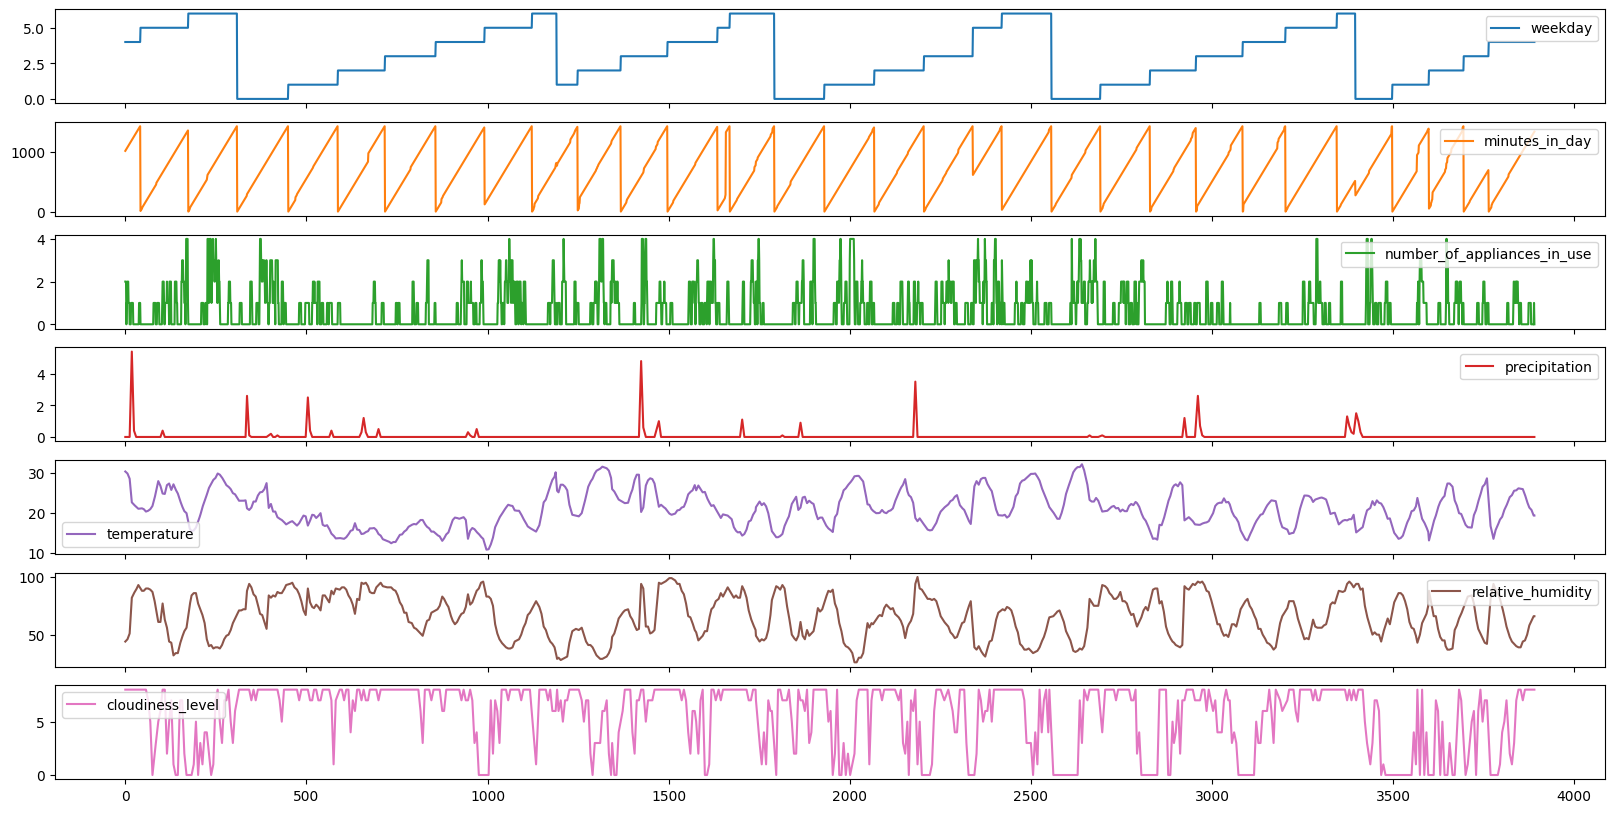

In [ ]:
df_merged_weather_usage.loc[
    :,
    [
        "weekday",
        "minutes_in_day",
        "number_of_appliances_in_use",
        "precipitation",
        "temperature",
        "relative_humidity",
        "cloudiness_level",
    ],
].plot(figsize=(20, 10), subplots=True)

In [ ]:
test_data["predicted"] = predictions

test_data

,minutes_in_day,number_of_appliances_in_use,precipitation,temperature,relative_humidity,cloudiness_level,precipitation_lead_3h,temperature_lead_3h,cloudiness_lead_3h,precipitation_lead_24h,...,precipitation_lag_24h,temperature_lag_24h,cloudiness_lag_24h,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,predicted
1385,210,0,0.0,22.466667,71.666667,8.000000,0.000000,26.933333,4.000000,0.000000,...,0.00,18.900000,8.000000,0.0,0.0,1.0,0.0,0.0,0.0,0
3886,1300,0,0.0,19.766667,64.666667,8.000000,0.000000,17.333333,2.666667,0.000000,...,0.00,18.533333,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0
2554,1410,1,0.0,21.045455,65.272727,5.818182,0.000000,19.009091,0.000000,0.027273,...,0.00,19.518182,8.000000,0.0,0.0,0.0,0.0,0.0,1.0,1
1593,1010,1,0.0,25.233333,48.666667,7.833333,0.000000,22.783333,0.833333,0.000000,...,0.00,27.483333,7.833333,0.0,0.0,0.0,1.0,0.0,0.0,0
796,830,2,0.0,17.166667,56.666667,8.000000,0.000000,18.100000,6.333333,0.000000,...,0.05,15.366667,7.000000,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,990,1,0.0,31.200000,30.500000,6.500000,0.000000,27.300000,1.500000,0.000000,...,0.00,26.750000,6.000000,0.0,1.0,0.0,0.0,0.0,0.0,1
2923,1010,0,1.0,19.566667,83.500000,7.000000,0.416667,18.316667,7.166667,0.000000,...,0.00,22.566667,7.833333,0.0,1.0,0.0,0.0,0.0,0.0,0
2497,810,1,0.0,29.450000,37.000000,3.000000,0.000000,29.400000,2.500000,0.000000,...,0.00,27.700000,7.500000,0.0,0.0,0.0,0.0,0.0,1.0,1
686,1130,2,0.0,16.183333,86.000000,8.000000,0.083333,14.366667,7.833333,0.000000,...,0.00,16.866667,8.000000,0.0,1.0,0.0,0.0,0.0,0.0,2


number_of_appliances_in_use       Axes(0.125,0.11;0.133621x0.77)
precipitation                  Axes(0.285345,0.11;0.133621x0.77)
temperature                     Axes(0.44569,0.11;0.133621x0.77)
relative_humidity              Axes(0.606034,0.11;0.133621x0.77)
cloudiness_level               Axes(0.766379,0.11;0.133621x0.77)
dtype: object

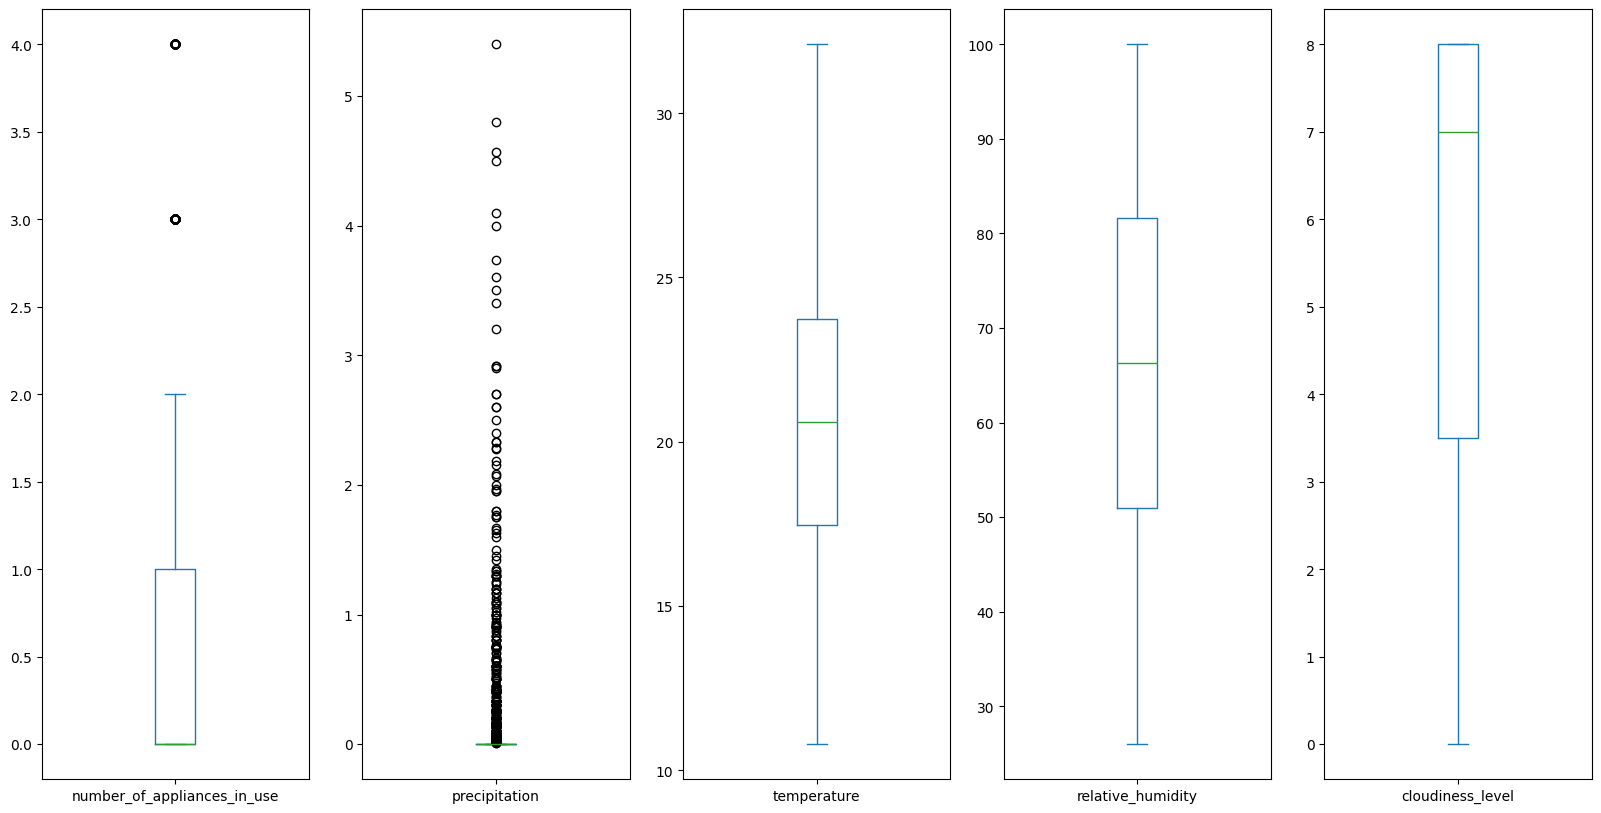

In [ ]:
df_merged_weather_usage.loc[
    :,
    [
        "number_of_appliances_in_use",
        "precipitation",
        "temperature",
        "relative_humidity",
        "cloudiness_level",
    ],
].plot(figsize=(20, 10), subplots=True, kind="box", sharex=False)

In [ ]:
# One hot encoding of the days of the week

df_merged_weather_usage_onehotencoded = pd.get_dummies(
    df_merged_weather_usage, columns=["weekday"], drop_first=True, dtype=float
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

features_to_use = df_merged_weather_usage_onehotencoded.drop(
    columns=["number_of_appliances_in_use"]
).columns

X_train, X_test, y_train, y_test = train_test_split(
    df_merged_weather_usage_onehotencoded[features_to_use],
    df_merged_weather_usage_onehotencoded["number_of_appliances_in_use"],
    test_size=0.2,
    random_state=0,
)

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.536261836765369

In [ ]:
pd.DataFrame(regressor.feature_importances_, index=features_to_use).sort_values(0, ascending=False)

,0
minutes_in_day,0.215923
temperature_lead_3h,0.116613
temperature_lead_24h,0.091399
temperature,0.086936
temperature_lag_3h,0.069774
temperature_lag_24h,0.056302
relative_humidity,0.056172
cloudiness_lag_24h,0.046421
cloudiness_lead_24h,0.044244
cloudiness_level,0.036323


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)

rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.7226650120246505

In [ ]:
pd.DataFrame(rfr.feature_importances_, index=features_to_use).sort_values(0, ascending=False)

,0
minutes_in_day,0.206536
temperature_lead_3h,0.143227
temperature_lead_24h,0.083261
temperature,0.072960
temperature_lag_24h,0.071346
relative_humidity,0.064861
temperature_lag_3h,0.062141
cloudiness_lag_3h,0.043390
cloudiness_level,0.038989
cloudiness_lag_24h,0.038469


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data, test_data = train_test_split(
    df_merged_weather_usage_onehotencoded,
    test_size=0.2,
    random_state=0,
)

predictor = TabularPredictor(label="number_of_appliances_in_use").fit(train_data=train_data)
predictions = predictor.predict(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240810_185958"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #39-Ubuntu SMP PREEMPT_DYNAMIC Fri Jul  5 21:49:14 UTC 2024
CPU Count:          16
Memory Avail:       17.22 GB / 31.26 GB (55.1%)
Disk Space Avail:   411.49 GB / 915.32 GB (45.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_qua

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20240810_185958")

predictions = predictor.predict(test_data)

score = predictor.evaluate_predictions(
    y_true=test_data["number_of_appliances_in_use"], y_pred=predictions, auxiliary_metrics=True
)

score

{'accuracy': 0.8151476251604621,
 'balanced_accuracy': 0.6343098528768081,
 'mcc': 0.6534160249436305}

In [ ]:
TabularPredictor.feature_importance(predictor, test_data)

Computing feature importance via permutation shuffling for 23 features using 779 rows with 5 shuffle sets...
	71.16s	= Expected runtime (14.23s per shuffle set)
	22.58s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
minutes_in_day,0.076508,0.013173,0.000101,5,0.103631,0.049385
temperature_lead_3h,0.039538,0.002783,0.000003,5,0.045268,0.033808
temperature_lag_24h,0.037741,0.004769,0.000030,5,0.047560,0.027922
cloudiness_lead_3h,0.035944,0.007430,0.000207,5,0.051242,0.020645
temperature_lag_3h,0.034660,0.004803,0.000043,5,0.044550,0.024770
temperature_lead_24h,0.034403,0.003998,0.000021,5,0.042635,0.026171
cloudiness_lag_24h,0.033633,0.003065,0.000008,5,0.039943,0.027322
cloudiness_level,0.028755,0.006130,0.000233,5,0.041376,0.016134
cloudiness_lag_3h,0.028755,0.005339,0.000136,5,0.039749,0.017761
temperature,0.020026,0.005566,0.000648,5,0.031486,0.008565


In [ ]:
original_features = [
    "minutes_in_day",
    "temperature",
    "relative_humidity",
    "cloudiness_level",
    "precipitation",
    "weekday_1",
    "weekday_2",
    "weekday_3",
    "weekday_4",
    "weekday_5",
    "weekday_6",
]

predictor_original_features = TabularPredictor(label="number_of_appliances_in_use").fit(
    train_data=train_data[original_features + ["number_of_appliances_in_use"]], verbose=False
)

predictions = predictor_original_features.predict(test_data[original_features])

score = predictor_original_features.evaluate_predictions(
    y_true=test_data["number_of_appliances_in_use"], y_pred=predictions, auxiliary_metrics=True
)

score

No path specified. Models will be saved in: "AutogluonModels/ag-20240810_190654"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #39-Ubuntu SMP PREEMPT_DYNAMIC Fri Jul  5 21:49:14 UTC 2024
CPU Count:          16
Memory Avail:       17.05 GB / 31.26 GB (54.6%)
Disk Space Avail:   410.87 GB / 915.32 GB (44.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_qua

[1000]	valid_set's multi_error: 0.22


	0.794	 = Validation score   (accuracy)
	6.44s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's multi_error: 0.238


	0.77	 = Validation score   (accuracy)
	4.19s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.79	 = Validation score   (accuracy)
	0.87s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.77	 = Validation score   (accuracy)
	0.87s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	0.778	 = Validation score   (accuracy)
	161.37s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.782	 = Validation score   (accuracy)
	0.88s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.796	 = Validation score   (accuracy)
	0.9s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: XGBoost ...
	0.756	 = Validation score   (accuracy)
	1.5s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	0.63	 = Validation score   (accuracy)
	4.6s	 = Training   runtime
	0.01s	 = Validation r

[1000]	valid_set's multi_error: 0.216


	0.786	 = Validation score   (accuracy)
	9.14s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'ExtraTreesEntr': 0.538, 'LightGBMXT': 0.462}
	0.806	 = Validation score   (accuracy)
	0.13s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 195.91s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2356.5 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240810_190654")


{'accuracy': 0.7971758664955071,
 'balanced_accuracy': 0.6604979744185859,
 'mcc': 0.6198908744755948}